<h1>Diyor Umurzakov, AIN-1-21</h1>

<h1>Лабораторная работа 7</h1>
<h2>Работа с текстовыми данными.</h2>

In [4]:
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import mglearn
import matplotlib.pyplot as plt
import numpy as np


In [5]:
laptop_shop_reviews = [
    "Прекрасный магазин ноутбуков с отличным обслуживанием!",
    "Добрейшие сотрудники в данном магазине ноутбуков. Прекрасное обслуживание.",
    "Отличный сайт у данного магазина ноутбуков и обслуживание на высшем уровне.",
    "Удобный магазин ноутбуков с разнообразным выбором. Персонал очень внимательный и доброжелательный.",
    "Широкий выбор ноутбуков. Цены приемлемые, обслуживание на высоте.",
    "Магазин ноутбуков в центре города. Атмосфера немного пафосная, но выбор техники впечатляет.",
    "Недорогой магазин ноутбуков с высоким качеством. Товары в целом неплохие, но обслуживание могло бы быть лучше.",
    "Магазин ноутбуков с эксклюзивными моделями. Выбор интересный, но на цену нужно обратить внимание.",
    "Отличный магазин для приобретения ноутбука. Компетентные консультанты и большой ассортимент.",
    "Магазин ноутбуков с акциями. Цены вполне доступные, а обслуживание на уровне.",
    "Магазин ноутбуков с высоким уровнем сервиса. Помогли подобрать отличный вариант.",
    "Магазин ноутбуков с широким ассортиментом. Отличные цены и профессиональные консультанты.",
    "Магазин ноутбуков с современными моделями. Цены соответствуют качеству товара.",
    "Магазин ноутбуков с быстрой доставкой. Заказывал - привезли в срок, все отлично.",
    "Магазин ноутбуков с гарантией на товар. Спокойно можно делать покупки.",
    "Магазин ноутбуков с дружелюбным персоналом. Помогли с выбором, все подробно объяснили.",
    "Магазин ноутбуков с высоким рейтингом. Не разочаровал, рекомендую.",
    "Магазин ноутбуков с актуальными моделями. Всегда можно найти что-то новенькое.",
    "Магазин ноутбуков с современными технологиями. Все, что нужно - здесь.",
    "Магазин ноутбуков с профессиональным обслуживанием. Решают любые вопросы быстро и качественно.",
    "Магазин ноутбуков с поддержкой клиентов. Ответили на все вопросы, помогли определиться с выбором.",
    "Магазин ноутбуков с оперативной службой поддержки. Очень удобно в случае возникновения проблем.",
    "Магазин ноутбуков с долговечными товарами. Покупкой доволен, все работает отлично.",
]

In [6]:
words = []
for review in laptop_shop_reviews:
    words += review.split()

word_counts = collections.Counter(words)
print(word_counts.most_common(10))

[('ноутбуков', 20), ('с', 20), ('Магазин', 16), ('на', 6), ('в', 5), ('и', 5), ('магазин', 4), ('обслуживание', 4), ('все', 4), ('Цены', 3)]


In [8]:
vect = CountVectorizer()
X = vect.fit_transform(laptop_shop_reviews)

print(f"Форма матрицы: {X.shape}")

Форма матрицы: (23, 129)


In [9]:
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=42)
document_topics = lda.fit_transform(X)
lda.components_.shape

(10, 129)

In [10]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5,
                           n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
магазин       моделями      магазин       все           ноутбуков     
консультанты  можно         ноутбуков     выбором       цены          
ноутбуков     магазин       обслуживание  помогли       обслуживание  
отличный      что           высоким       дружелюбным   выбор         
ассортимент   актуальными   но            объяснили     широкий       
большой       то            товары        персоналом    приемлемые    
приобретения  найти         могло         подробно      высоте        
компетентные  всегда        быть          магазин       товара        
для           новенькое     недорогой     ноутбуков     качеству      
ноутбука      ноутбуков     неплохие      на            соответствуют 


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
на  

In [11]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=42)
document_topics100 = lda100.fit_transform(X)

topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
магазин       эксклюзивными эксклюзивными эксклюзивными эксклюзивными магазин       ноутбуков     
отличный      ноутбуков     ноутбуков     ноутбуков     ноутбуков     приобретения  магазин       
подобрать     долговечными  долговечными  долговечными  долговечными  отличный      впечатляет    
сервиса       доставкой     доставкой     доставкой     доставкой     консультанты  можно         
вариант       доступные     доступные     доступные     доступные     ассортимент   пафосная      
ноутбуков     дружелюбным   дружелюбным   дружелюбным   дружелюбным   для           техники       
высоким       заказывал     заказывал     заказывал     заказывал     большой       города        
помогли       здесь         здесь         здесь         здесь         ноутбука      товар         
уровнем   

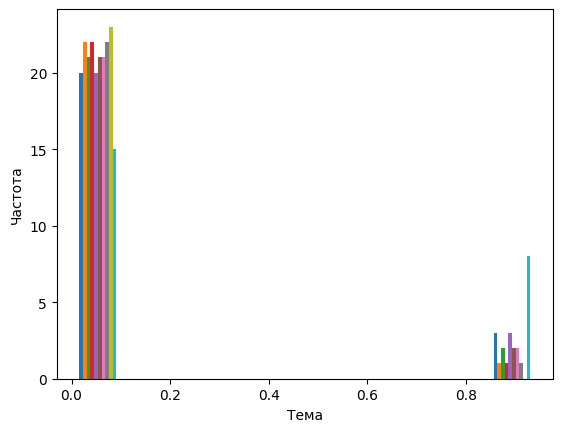

In [12]:
plt.hist(document_topics, bins=10)
plt.xlabel("Тема")
plt.ylabel("Частота")
plt.show()

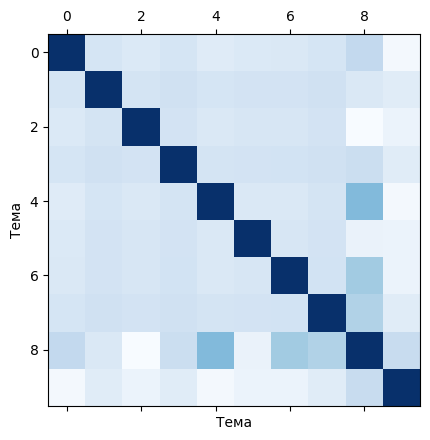

In [13]:
# Корреляция тем
correlation = np.corrcoef(document_topics.T)

plt.matshow(correlation, cmap="Blues")
plt.xlabel("Тема")
plt.ylabel("Тема")
plt.show()

<h2>Вывод:</h2>

<h3>Мешок слов - это эффективный метод представления текстовых данных, который широко используется в обработке естественного языка. 
В данном контексте, использование мешка слов позволяет провести анализ отзывов о магазине ноутбуков. Например, с его помощью можно выявить ключевые темы, которые наиболее важны для клиентов. Этот метод обработки текста полезен для задач, таких как определение популярных моделей ноутбуков, выявление основных пожеланий покупателей и оценка общего восприятия магазина. </h3>